In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import joblib
import pickle 


In [2]:
df = pd.read_csv('D:\\MATERIALS\\projects\\aml\\heart.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
print("dataset length :" ,len(df))
df.shape


dataset length : 1190


(1190, 12)

In [4]:
# Define numeric columns
numeric_columns = ['age','chest pain type','resting bp s','cholesterol','resting ecg','max heart rate','exercise angina','oldpeak'	,'ST slope'	]

# Function to visualize data distribution using box plots

def visualize_boxplot(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title('Box Plot - ' + col)
        plt.ylabel(col)
        plt.show()


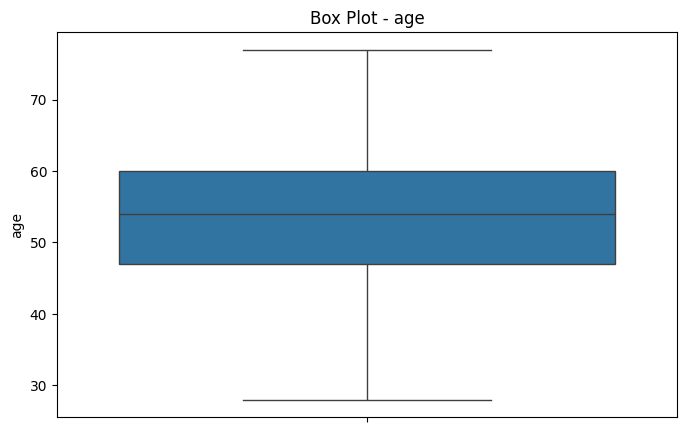

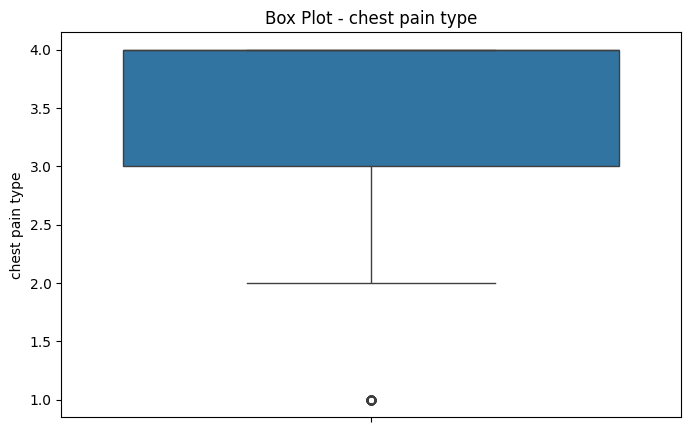

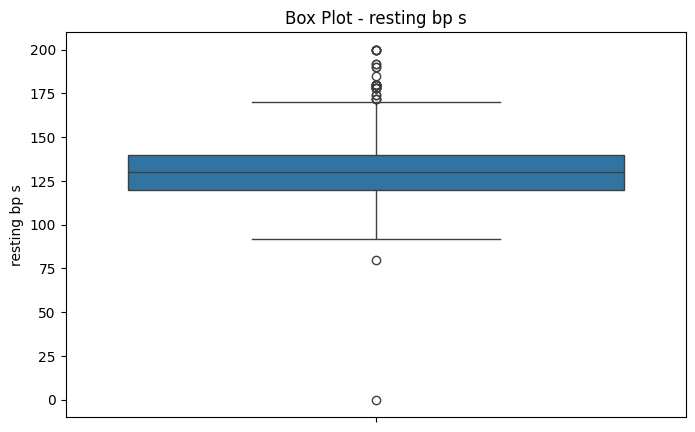

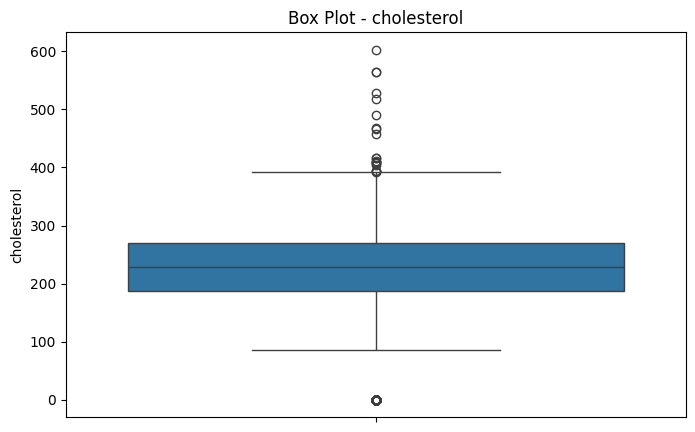

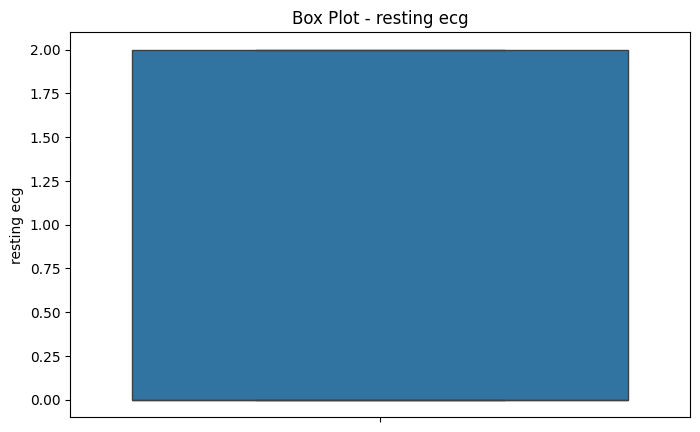

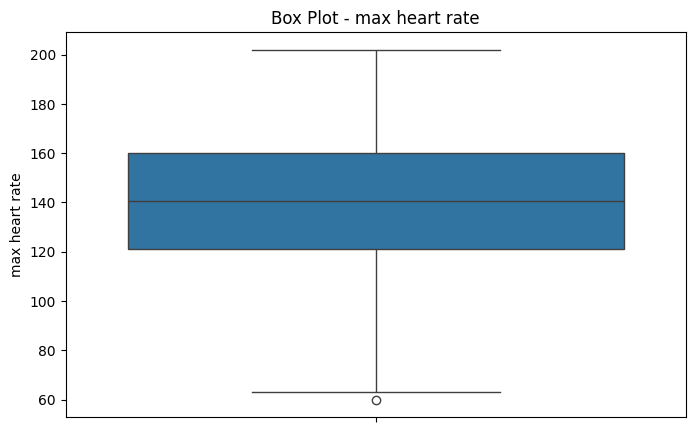

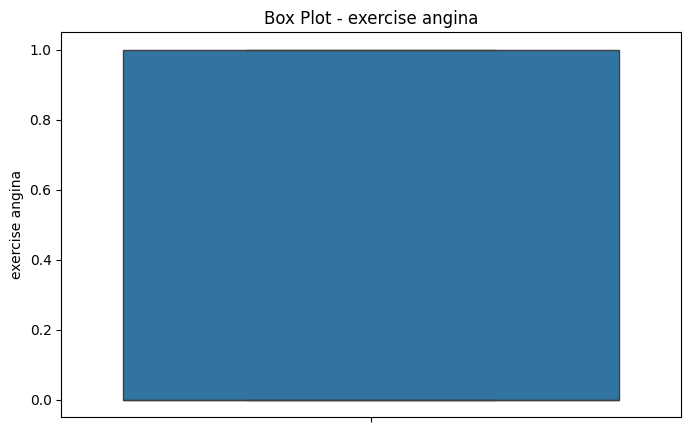

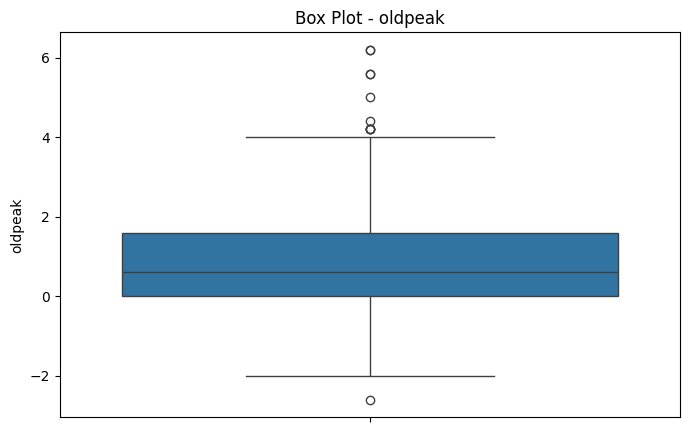

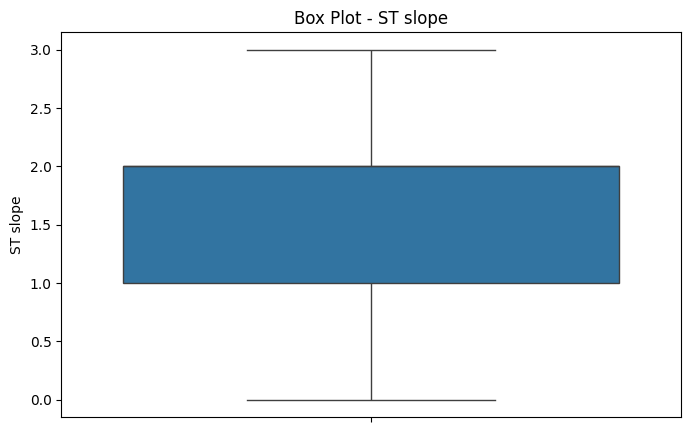

In [5]:
visualize_boxplot(df, numeric_columns)
new_df=df.copy()
for col in numeric_columns:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_df[col] = np.where(
        new_df[col] > upper_bound,
        upper_bound,
        np.where(
            new_df[col] < lower_bound,
            lower_bound,
            new_df[col]
        )
    )
df = new_df


In [6]:
# visualize df after removing outliers
#visualize_boxplot(df, numeric_columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   float64
 3   resting bp s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   float64
 7   max heart rate       1190 non-null   float64
 8   exercise angina      1190 non-null   float64
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   float64
 11  target               1190 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 111.7 KB


In [8]:

# scaling
scaler = StandardScaler()
df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']] = scaler.fit_transform(df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])


with open('scaler.pkl','wb') as f :
    pickle.dump(scaler, f) 
    


In [9]:
# split data
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((952, 11), (238, 11), (952,), (238,))

In [10]:


# Define hyperparameter ranges
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15],
    'min_samples_split':  [ 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15],
    'min_samples_leaf':  [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15]
}

best_accuracy = 0
best_params = {}

# Iterate through all hyperparameter combinations
for criterion in hyperparameters['criterion']:
    for splitter in hyperparameters['splitter']:
        for max_depth in hyperparameters['max_depth']:
            for min_samples_split in hyperparameters['min_samples_split']:
                for min_samples_leaf in hyperparameters['min_samples_leaf']:
                    # Create and train the Decision Tree Classifier
                    dt = DecisionTreeClassifier(criterion=criterion,
                                                splitter=splitter,
                                                max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf,
                                                random_state=42)
                    dt.fit(X_train, y_train)

                    # Make predictions and calculate accuracy
                    y_pred = dt.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)

                    # Update best parameters if a better accuracy is found
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'criterion': criterion,
                                       'splitter': splitter,
                                       'max_depth': max_depth,
                                       'min_samples_split': min_samples_split,
                                       'min_samples_leaf': min_samples_leaf}

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.2f}")


Best hyperparameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 1}
Best accuracy: 0.92


In [11]:

dt = DecisionTreeClassifier ( max_depth=9, criterion='entropy',min_samples_split= 13, min_samples_leaf= 1,splitter='random', random_state=42)

dt.fit(X_train, y_train)

joblib.dump(dt,'dtmodel.pkl')

dt= joblib.load('dtmodel.pkl')

y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
test_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy for Test Set:", test_accuracy)

# Predict train-set labels
y_pred_train = dt.predict(X_train)

# Evaluate train-set accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)*100

# Print the accuracy for the training set
print("Accuracy for Train Set:", train_accuracy)



Accuracy for Test Set: 91.59663865546219
Accuracy for Train Set: 90.02100840336135


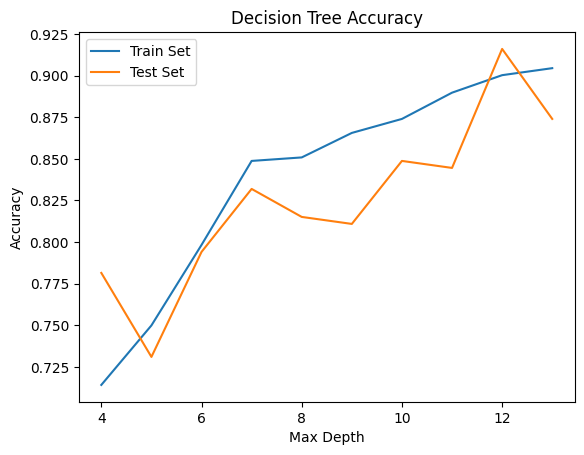

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_accuracies = []
test_accuracies = []
for depth in range(1, 11):
    # Fit dt to the training set
    dt.set_params(max_depth=depth)
    dt.fit(X_train, y_train)

    # Predict test-set labels
    y_pred = dt.predict(X_test)

    # Evaluate test-set accuracy
    test_accuracy = accuracy_score(y_test, y_pred) 
    test_accuracies.append(test_accuracy)

    # Predict train-set labels
    y_pred_train = dt.predict(X_train)

    # Evaluate train-set accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train) 
    train_accuracies.append(train_accuracy)

# Plotting
depths = range(4, 14)
plt.plot(depths, train_accuracies, label='Train Set')
plt.plot(depths, test_accuracies, label='Test Set')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy')
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

validation_ratio = 0.2  

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio, random_state=42)

# Perform cross-validation with folds
cv_scores = cross_val_score(dt, X_train, y_train, cv=4)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())


Cross-Validation Scores: [0.82198953 0.84210526 0.79473684 0.81578947]
Mean Cross-Validation Score: 0.818655276935795
Standard Deviation of Cross-Validation Scores: 0.0168917394182917


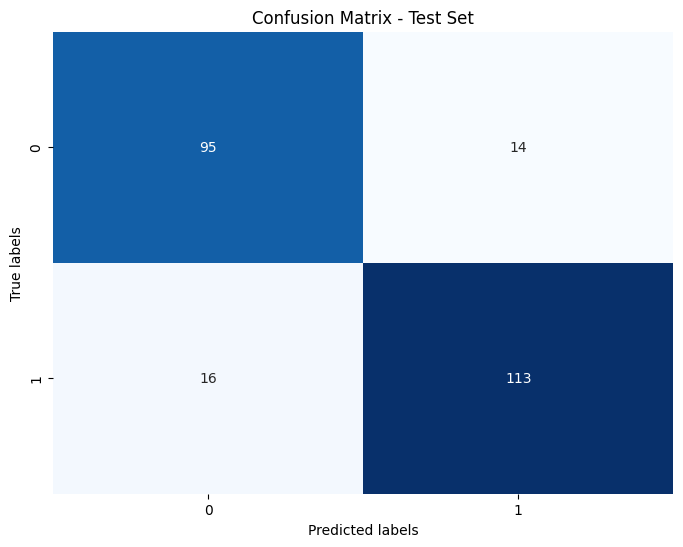

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()


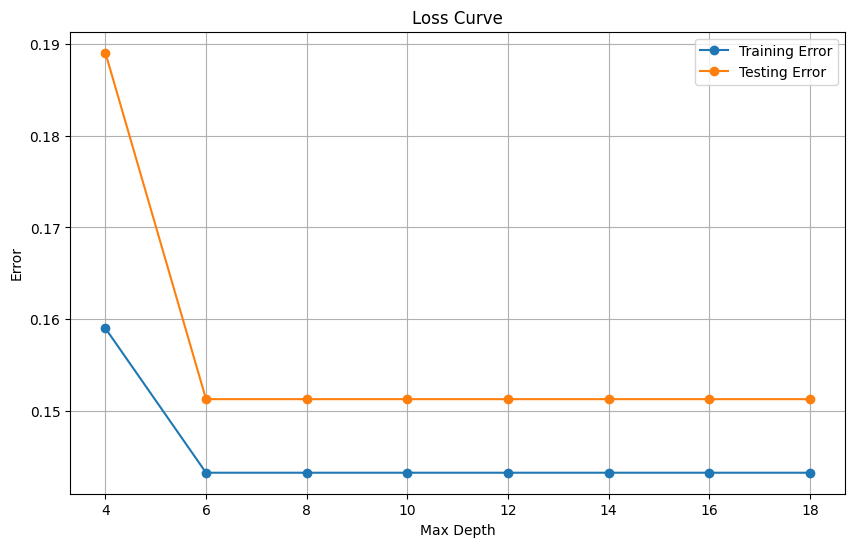

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter values
max_depth_values = [4,6,8,10, 12, 14, 16, 18]
train_errors = []
test_errors = []

# Iterate over different hyperparameter values
for max_depth in max_depth_values:
    # Create Decision Tree Classifier with current hyperparameters
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=2, min_samples_leaf=15, random_state=42)
    # Fit dt to the training set
    dt.fit(X_train, y_train)
    # Predict train-set labels
    y_pred_train = dt.predict(X_train)
    # Predict test-set labels
    y_pred_test = dt.predict(X_test)
    # Calculate training errora
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    # Calculate testing error
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, marker='o', label='Training Error')
plt.plot(max_depth_values, test_errors, marker='o', label='Testing Error')
plt.title('Loss Curve')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()
